In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
from scipy import stats

In [90]:
!pip install category-encoders

In [91]:
laptop_df = pd.read_csv('laptop_prices.csv')

In [92]:
laptop_df

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


In [93]:
laptop_df.columns

Index(['Brand', 'Processor', 'RAM (GB)', 'Storage', 'GPU',
       'Screen Size (inch)', 'Resolution', 'Battery Life (hours)',
       'Weight (kg)', 'Operating System', 'Price ($)'],
      dtype='object')

In [94]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [95]:
laptop_df.isna().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


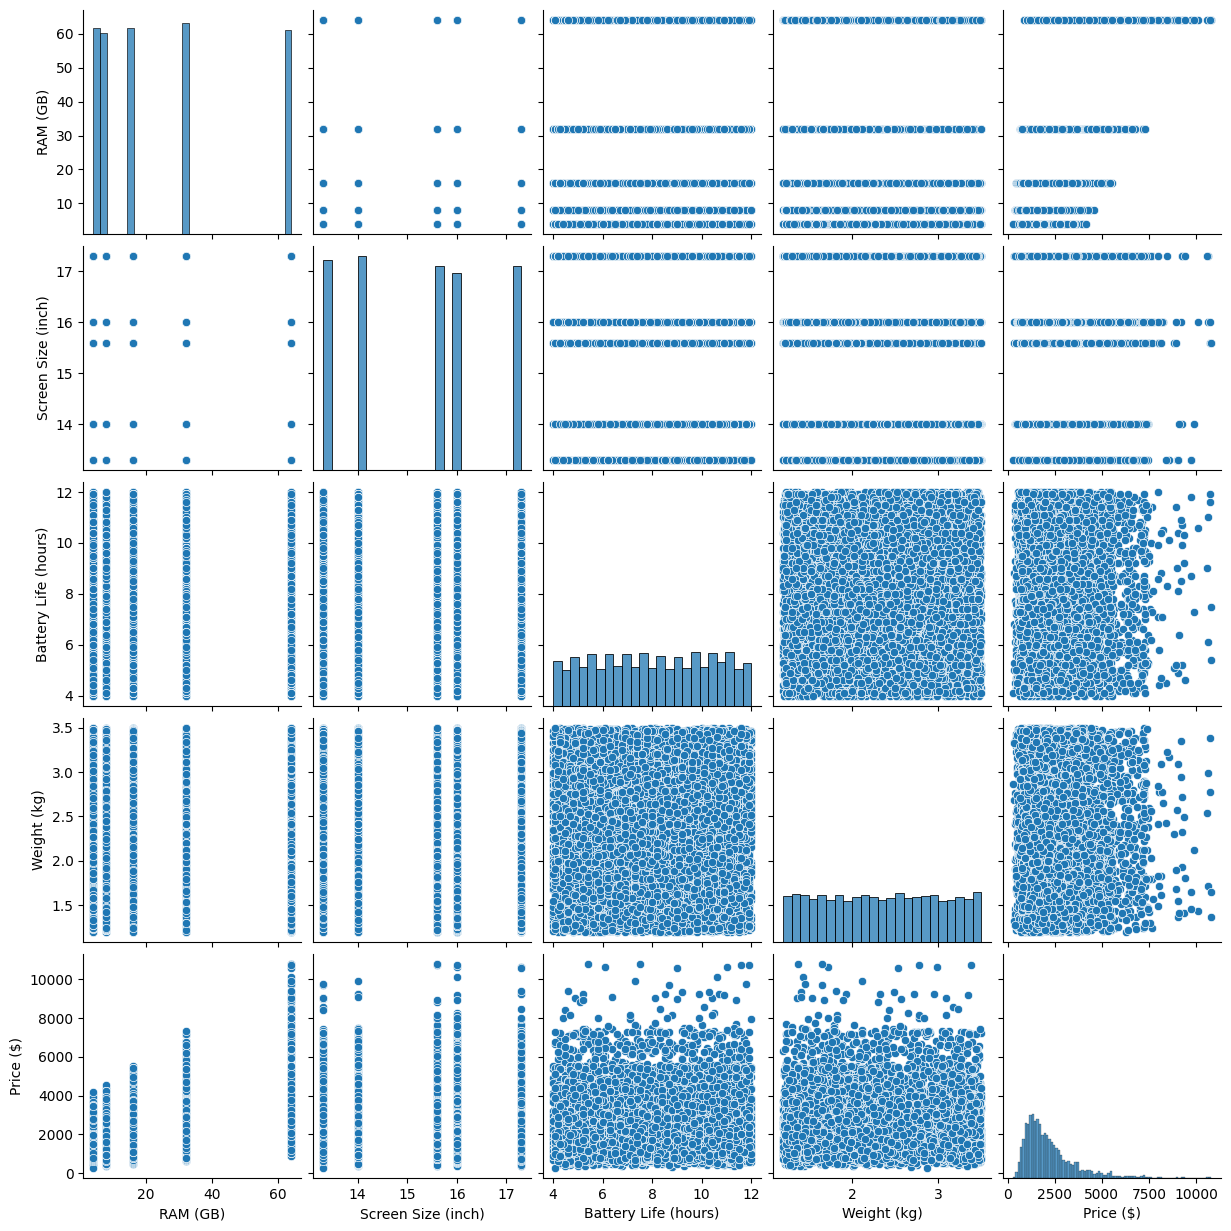

In [96]:
sns.pairplot(laptop_df)

In [97]:
laptop_df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [98]:
from category_encoders import CountEncoder

In [99]:
count_enc = CountEncoder()

In [100]:
exclude_columns = ['Battery Life (hours)', 'Weight (kg)', 'Price ($)']
categorical_columns = [col for col in laptop_df.columns if col not in exclude_columns]
categorical_columns

['Brand',
 'Processor',
 'RAM (GB)',
 'Storage',
 'GPU',
 'Screen Size (inch)',
 'Resolution',
 'Operating System']

In [101]:
count_enc = CountEncoder()
laptop_df_encoded = laptop_df.copy()
laptop_df_encoded[categorical_columns] = count_enc.fit_transform(laptop_df[categorical_columns])

In [102]:
laptop_df_encoded

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,1262,1500,64,2420,1698,17.3,2929,8.9,1.42,2952,3997.07
1,1125,1410,4,2313,1647,14.0,2932,9.4,2.57,2946,1355.78
2,1165,1429,32,2415,1679,13.3,2977,8.5,1.74,2952,2673.07
3,1145,1429,4,2318,1647,13.3,2932,10.5,3.10,2954,751.17
4,1125,1570,4,2318,1676,16.0,2977,5.7,3.38,2946,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,1165,1570,4,2415,1746,17.3,2932,11.5,1.58,2916,704.82
11764,1165,1570,4,2415,1669,16.0,2932,9.5,2.14,2946,775.59
11765,1125,1472,4,2415,1676,15.6,2929,8.2,2.05,2946,2789.46
11766,1163,1410,16,2420,1653,13.3,2930,7.5,1.48,2916,1067.13


In [103]:
category_mappings = {col: laptop_df[col].value_counts().to_dict() for col in categorical_columns}

category_mappings

{'Brand': {'Apple': 1262,
  'HP': 1208,
  'MSI': 1190,
  'Microsoft': 1175,
  'Dell': 1170,
  'Asus': 1165,
  'Acer': 1165,
  'Samsung': 1163,
  'Lenovo': 1145,
  'Razer': 1125},
 'Processor': {'Intel i3': 1570,
  'Intel i7': 1509,
  'AMD Ryzen 3': 1500,
  'AMD Ryzen 9': 1472,
  'Intel i9': 1456,
  'Intel i5': 1429,
  'AMD Ryzen 5': 1422,
  'AMD Ryzen 7': 1410},
 'RAM (GB)': {32: 2410, 16: 2361, 4: 2361, 64: 2340, 8: 2296},
 'Storage': {'512GB SSD': 2420,
  '2TB SSD': 2415,
  '256GB SSD': 2318,
  '1TB SSD': 2313,
  '1TB HDD': 2302},
 'GPU': {'Nvidia RTX 2060': 1746,
  'Nvidia GTX 1650': 1698,
  'Nvidia RTX 3060': 1679,
  'AMD Radeon RX 6600': 1676,
  'AMD Radeon RX 6800': 1669,
  'Integrated': 1653,
  'Nvidia RTX 3080': 1647},
 'Screen Size (inch)': {14.0: 2443,
  13.3: 2402,
  17.3: 2334,
  15.6: 2331,
  16.0: 2258},
 'Resolution': {'3840x2160': 2977,
  '1366x768': 2932,
  '1920x1080': 2930,
  '2560x1440': 2929},
 'Operating System': {'Windows': 2954,
  'FreeDOS': 2952,
  'Linux': 294

In [104]:
ram_mappings = {32: 2410, 4: 2361, 16: 2361, 64: 2340, 8: 2296}
screen_mappings = {14.0: 2443,
  13.3: 2402,
  17.3: 2334,
  15.6: 2331,
  16.0: 2258}

In [105]:
laptop_df_encoded['Screen Size (inch)'].astype(int)

,Screen Size (inch)
0,17
1,14
2,13
3,13
4,16
...,...
11763,17
11764,16
11765,15
11766,13


In [106]:
laptop_df_encoded['RAM (GB)'] = laptop_df_encoded['RAM (GB)'].map(ram_mappings)

In [107]:
laptop_df_encoded['Screen Size (inch)'] = laptop_df_encoded['Screen Size (inch)'].map(screen_mappings)

In [108]:
laptop_df_encoded

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,1262,1500,2340,2420,1698,2334,2929,8.9,1.42,2952,3997.07
1,1125,1410,2361,2313,1647,2443,2932,9.4,2.57,2946,1355.78
2,1165,1429,2410,2415,1679,2402,2977,8.5,1.74,2952,2673.07
3,1145,1429,2361,2318,1647,2402,2932,10.5,3.10,2954,751.17
4,1125,1570,2361,2318,1676,2258,2977,5.7,3.38,2946,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,1165,1570,2361,2415,1746,2334,2932,11.5,1.58,2916,704.82
11764,1165,1570,2361,2415,1669,2258,2932,9.5,2.14,2946,775.59
11765,1125,1472,2361,2415,1676,2331,2929,8.2,2.05,2946,2789.46
11766,1163,1410,2361,2420,1653,2402,2930,7.5,1.48,2916,1067.13


In [109]:
import plotly.express as px

In [110]:
corr_matrix = laptop_df_encoded.corr()

In [111]:
fig = px.imshow(corr_matrix, text_auto=True, color_continuous_scale ='algae')
fig.show()

<Axes: >

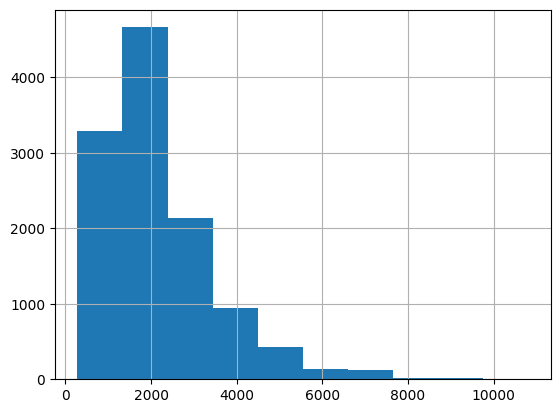

In [112]:
laptop_df_encoded['Price ($)'].hist()

In [113]:
laptop_df_encoded['Price ($)'] = np.log(laptop_df_encoded['Price ($)'])

In [114]:
X = laptop_df_encoded.drop(columns=['Price ($)'])
y = laptop_df_encoded['Price ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [115]:
print(f'{X_train.shape}, {X_test.shape}\n{y_train.shape}, {y_test.shape}')

(9414, 10), (2354, 10)
(9414,), (2354,)


In [116]:
X_train.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System
957,1190,1500,2361,2318,1669,2402,2929,11.0,1.93,2946
6950,1125,1410,2361,2318,1653,2402,2977,8.6,3.11,2952
6186,1190,1570,2361,2420,1647,2258,2929,6.9,2.87,2952
10719,1190,1429,2340,2302,1669,2402,2977,4.5,2.93,2952
3592,1163,1500,2361,2302,1679,2258,2977,10.0,2.51,2954


In [117]:
model = sm.regression.linear_model.OLS(y_train, X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price ($)   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.144e+05
Date:                Mon, 07 Apr 2025   Prob (F-statistic):                        0.00
Time:                        10:52:35   Log-Likelihood:                         -6815.2
No. Observations:                9414   AIC:                                  1.365e+04
Df Residuals:                    9404   BIC:                                  1.372e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [118]:
X_train = X_train.drop(columns=['Battery Life (hours)', 'Storage' ,'Weight (kg)'])
X_test = X_test.drop(columns=['Battery Life (hours)', 'Storage', 'Weight (kg)'])

In [119]:
model = sm.regression.linear_model.OLS(y_train, X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price ($)   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          3.063e+05
Date:                Mon, 07 Apr 2025   Prob (F-statistic):                        0.00
Time:                        10:52:38   Log-Likelihood:                         -6816.4
No. Observations:                9414   AIC:                                  1.365e+04
Df Residuals:                    9407   BIC:                                  1.370e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [121]:
model.predict(X_test)

,0
10445,7.328571
6057,7.277985
10999,7.490196
11310,7.541437
11258,7.338184
...,...
3650,7.265621
7680,7.628045
7073,7.454482
1330,7.596344


In [122]:
'Train RMSE:', np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

('Train RMSE:', np.float64(0.49913879910020265))

In [123]:
'RMSE_TEST:', np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

('RMSE_TEST:', np.float64(0.5010144554674971))

In [124]:
category_mappings

{'Brand': {'Apple': 1262,
  'HP': 1208,
  'MSI': 1190,
  'Microsoft': 1175,
  'Dell': 1170,
  'Asus': 1165,
  'Acer': 1165,
  'Samsung': 1163,
  'Lenovo': 1145,
  'Razer': 1125},
 'Processor': {'Intel i3': 1570,
  'Intel i7': 1509,
  'AMD Ryzen 3': 1500,
  'AMD Ryzen 9': 1472,
  'Intel i9': 1456,
  'Intel i5': 1429,
  'AMD Ryzen 5': 1422,
  'AMD Ryzen 7': 1410},
 'RAM (GB)': {32: 2410, 16: 2361, 4: 2361, 64: 2340, 8: 2296},
 'Storage': {'512GB SSD': 2420,
  '2TB SSD': 2415,
  '256GB SSD': 2318,
  '1TB SSD': 2313,
  '1TB HDD': 2302},
 'GPU': {'Nvidia RTX 2060': 1746,
  'Nvidia GTX 1650': 1698,
  'Nvidia RTX 3060': 1679,
  'AMD Radeon RX 6600': 1676,
  'AMD Radeon RX 6800': 1669,
  'Integrated': 1653,
  'Nvidia RTX 3080': 1647},
 'Screen Size (inch)': {14.0: 2443,
  13.3: 2402,
  17.3: 2334,
  15.6: 2331,
  16.0: 2258},
 'Resolution': {'3840x2160': 2977,
  '1366x768': 2932,
  '1920x1080': 2930,
  '2560x1440': 2929},
 'Operating System': {'Windows': 2954,
  'FreeDOS': 2952,
  'Linux': 294

In [125]:
my_laptop = pd.DataFrame({'Brand': 1208, 'Processor': 1422, 'RAM (GB)': 2361,
                          'Storage': 2420, 'GPU': 1679, 'Screen Size (inch)': 2331,
                          'Resolution': 2930, 'Operating System': 2954}, index = [0])

In [126]:
my_laptop.dtypes

,0
Brand,int64
Processor,int64
RAM (GB),int64
Storage,int64
GPU,int64
Screen Size (inch),int64
Resolution,int64
Operating System,int64


In [127]:
my_laptop

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Operating System
0,1208,1422,2361,2420,1679,2331,2930,2954


In [129]:
np.exp(model.predict(my_laptop.drop(columns=['Storage'])))


,0
0,1908.50126


In [132]:
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(model.predict(X_test))))

np.float64(1262.7911490601)